In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pwd

/Users/zschulzb/OneDrive/_mydev/galvanize/capstones/cap2/project_init/src


In [2]:
season_18_19 = pd.read_csv('../data/premier_league/season-1819_csv.csv')
season_17_18 = pd.read_csv('../data/premier_league/season-1718_csv.csv')
season_16_17 = pd.read_csv('../data/premier_league/season-1617_csv.csv')
season_15_16 = pd.read_csv('../data/premier_league/season-1516_csv.csv')
season_14_15 = pd.read_csv('../data/premier_league/season-1415_csv.csv')
season_13_14 = pd.read_csv('../data/premier_league/season-1314_csv.csv')
season_12_13 = pd.read_csv('../data/premier_league/season-1213_csv.csv')
season_11_12 = pd.read_csv('../data/premier_league/season-1112_csv.csv')
season_10_11 = pd.read_csv('../data/premier_league/season-1011_csv.csv')
season_09_10 = pd.read_csv('../data/premier_league/season-0910_csv.csv')

In [3]:
seasons = [season_18_19, season_17_18, season_16_17, season_15_16, season_14_15, season_13_14, season_12_13, season_11_12, season_10_11, season_09_10]

In [4]:
ten_season_df = pd.concat(seasons)

In [5]:
stat_features = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

described_features = ['HomeTeam', 'AwayTeam', 'Final_Goals_H', 'Final_Goals_A', 'Final_Result', 'Half_Goals_H', 'Half_Goals_A', 'Half_Result', 'Referee', 'Shots_H', 'Shots_A', 'Target_Shots_H', 'Target_Shots_A', 'Fouls_H', 'Fouls_A', 'Corners_H', 'Corners_A', 'Yellow_H', 'Yellow_A', 'Red_H', 'Red_A']

In [6]:
game_stats = ten_season_df[stat_features]
game_stats.Date = pd.to_datetime(game_stats.Date)
game_stats.set_index(game_stats['Date'], inplace=True)
game_stats.drop(['Date'], axis=1, inplace=True)
game_stats.columns = described_features
game_stats.drop(['Half_Goals_H','Half_Goals_A', 'Half_Result','Referee'], axis=1, inplace=True)

In [7]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3800 entries, 2018-10-08 to 2010-05-09
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        3800 non-null   object
 1   AwayTeam        3800 non-null   object
 2   Final_Goals_H   3800 non-null   int64 
 3   Final_Goals_A   3800 non-null   int64 
 4   Final_Result    3800 non-null   object
 5   Shots_H         3800 non-null   int64 
 6   Shots_A         3800 non-null   int64 
 7   Target_Shots_H  3800 non-null   int64 
 8   Target_Shots_A  3800 non-null   int64 
 9   Fouls_H         3800 non-null   int64 
 10  Fouls_A         3800 non-null   int64 
 11  Corners_H       3800 non-null   int64 
 12  Corners_A       3800 non-null   int64 
 13  Yellow_H        3800 non-null   int64 
 14  Yellow_A        3800 non-null   int64 
 15  Red_H           3800 non-null   int64 
 16  Red_A           3800 non-null   int64 
dtypes: int64(14), object(3)
memory usa

In [8]:
team_home = game_stats[game_stats.HomeTeam == 'Man City']
team_away = game_stats[game_stats.AwayTeam == 'Man City']

In [9]:
total_wins = np.sum(team_home.Final_Result == 'H') + np.sum(team_away.Final_Result == 'A')
total_loss = np.sum(team_home.Final_Result == 'A') + np.sum(team_away.Final_Result == 'H')
total_draw = np.sum(team_home.Final_Result == 'D') + np.sum(team_away.Final_Result == 'D')
total_wins, total_loss, total_draw, total_wins+total_loss+total_draw == len(team_home+team_away)

(247, 62, 71, True)

In [10]:
#print('Seasons 09-17 win percentage)

print('''Team Win Percentage: {0:0.2f}%
Team Loss Percentage: {1:0.2f}%
Team Draw Percentage: {2:0.2f}%'''.format((total_wins/len(team_home+team_away))*100, 
                                            (total_loss/len(team_home+team_away))*100,
                                            (total_draw/len(team_home+team_away))*100))

Team Win Percentage: 65.00%
Team Loss Percentage: 16.32%
Team Draw Percentage: 18.68%


In [11]:
home_final_dummies = pd.get_dummies(team_home.Final_Result, prefix='Home_Final', drop_first=True)
# home_half_dummies = pd.get_dummies(team_home.Half_Result, prefix='Home_Half', drop_first=True)

In [12]:
home_final_dummies.Home_Final_D.value_counts()

0    163
1     27
Name: Home_Final_D, dtype: int64

In [13]:
team_home = pd.concat([team_home, home_final_dummies], axis=1)

In [14]:
pass
# invert logic so every instance of 1 is a win for selected team
# i.e. - drop the Away_Final_H for if Away wins when away selected team still wins

away_final_dummies = pd.get_dummies(team_away.Final_Result, prefix='Away_Final')
# away_half_dummies = pd.get_dummies(team_away.Half_Result, prefix='Away_Half', drop_first=True)

In [15]:
away_final_dummies.Away_Final_H.value_counts()

0    146
1     44
Name: Away_Final_H, dtype: int64

In [16]:
away_final_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-12-08 to 2010-05-09
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Away_Final_A  190 non-null    uint8
 1   Away_Final_D  190 non-null    uint8
 2   Away_Final_H  190 non-null    uint8
dtypes: uint8(3)
memory usage: 7.0 KB


In [17]:
away_final_dummies

,Away_Final_A,Away_Final_D,Away_Final_H
Date,,,
2018-12-08,1,0,0
2018-08-25,0,1,0
2018-09-22,1,0,0
2018-07-10,0,1,0
2018-10-29,1,0,0
...,...,...,...
2010-03-14,0,1,0
2010-03-21,1,0,0
2010-04-03,1,0,0


In [19]:
away_final_dummies.Away_Final_D.unique(), home_final_dummies.Home_Final_D.unique()

(array([0, 1], dtype=uint8), array([0, 1], dtype=uint8))

In [20]:
team_away = pd.concat([team_away, away_final_dummies], axis=1)
team_away.drop('Away_Final_H', axis=1, inplace=True)

In [17]:
# rolling 10 game avg
# manch_home['goals_SMA'] = manch_home.Final_Goals_H[::-1].rolling(10).mean()

In [21]:
team_home.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-08-19 to 2010-05-05
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        190 non-null    object
 1   AwayTeam        190 non-null    object
 2   Final_Goals_H   190 non-null    int64 
 3   Final_Goals_A   190 non-null    int64 
 4   Final_Result    190 non-null    object
 5   Shots_H         190 non-null    int64 
 6   Shots_A         190 non-null    int64 
 7   Target_Shots_H  190 non-null    int64 
 8   Target_Shots_A  190 non-null    int64 
 9   Fouls_H         190 non-null    int64 
 10  Fouls_A         190 non-null    int64 
 11  Corners_H       190 non-null    int64 
 12  Corners_A       190 non-null    int64 
 13  Yellow_H        190 non-null    int64 
 14  Yellow_A        190 non-null    int64 
 15  Red_H           190 non-null    int64 
 16  Red_A           190 non-null    int64 
 17  Home_Final_D    190 non-null    uin

In [16]:
#concat to first dataframe, don't make a second
team_away.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-12-08 to 2010-05-09
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        190 non-null    object
 1   AwayTeam        190 non-null    object
 2   Final_Goals_H   190 non-null    int64 
 3   Final_Goals_A   190 non-null    int64 
 4   Final_Result    190 non-null    object
 5   Shots_H         190 non-null    int64 
 6   Shots_A         190 non-null    int64 
 7   Target_Shots_H  190 non-null    int64 
 8   Target_Shots_A  190 non-null    int64 
 9   Fouls_H         190 non-null    int64 
 10  Fouls_A         190 non-null    int64 
 11  Corners_H       190 non-null    int64 
 12  Corners_A       190 non-null    int64 
 13  Yellow_H        190 non-null    int64 
 14  Yellow_A        190 non-null    int64 
 15  Red_H           190 non-null    int64 
 16  Red_A           190 non-null    int64 
 17  Away_Final_A    190 non-null    uin

In [22]:
full_record_list = [team_home, team_away]
full_record = pd.concat(full_record_list)

In [24]:
full_record.Away_Final_D.unique(), full_record.Home_Final_D.unique()

(array([nan,  0.,  1.]), array([ 0.,  1., nan]))

In [30]:
full_record.Home_Final_D.fillna(0, inplace=True)
full_record.Away_Final_D.fillna(0, inplace=True)

In [31]:
full_record.Away_Final_D.unique(), full_record.Home_Final_D.unique()

(array([0., 1.]), array([0., 1.]))

In [32]:
full_record['Final_D'] = full_record.Home_Final_D + full_record.Away_Final_D

In [34]:
full_record.Final_D.unique()

array([0., 1.])

In [37]:
full_record.drop(['Home_Final_D', 'Away_Final_D'], axis=1, inplace=True)

In [38]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2018-08-19 to 2010-05-09
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomeTeam        380 non-null    object 
 1   AwayTeam        380 non-null    object 
 2   Final_Goals_H   380 non-null    int64  
 3   Final_Goals_A   380 non-null    int64  
 4   Final_Result    380 non-null    object 
 5   Shots_H         380 non-null    int64  
 6   Shots_A         380 non-null    int64  
 7   Target_Shots_H  380 non-null    int64  
 8   Target_Shots_A  380 non-null    int64  
 9   Fouls_H         380 non-null    int64  
 10  Fouls_A         380 non-null    int64  
 11  Corners_H       380 non-null    int64  
 12  Corners_A       380 non-null    int64  
 13  Yellow_H        380 non-null    int64  
 14  Yellow_A        380 non-null    int64  
 15  Red_H           380 non-null    int64  
 16  Red_A           380 non-null    int64  
 17  Home_Final_H    

In [38]:
# prove time is out of order
full_record.index[:193]

DatetimeIndex(['2018-08-19', '2018-01-09', '2018-09-15', '2018-09-29',
               '2018-10-20', '2018-04-11', '2018-11-11', '2018-01-12',
               '2018-12-15', '2018-12-22',
               ...
               '2010-02-21', '2010-03-24', '2010-03-29', '2010-04-11',
               '2010-04-17', '2010-05-01', '2010-05-05', '2018-12-08',
               '2018-08-25', '2018-09-22'],
              dtype='datetime64[ns]', name='Date', length=193, freq=None)

In [39]:
full_record = full_record.sort_index()[::-1]

In [40]:
# binary if team is home or not

full_record['Home_Field_Advantage'] = np.where(full_record.HomeTeam == 'Man City', 1, 0)

In [70]:
# full_record['Accum_home_reds'] = full_record.Red_A[full_record.HomeTeam == 'Man City'].rolling(10).sum()

In [71]:
# full_record['Accum_away_reds'] = full_record.Red_A[full_record.AwayTeam == 'Man City'].rolling(10).sum()

In [41]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomeTeam              380 non-null    object 
 1   AwayTeam              380 non-null    object 
 2   Final_Goals_H         380 non-null    int64  
 3   Final_Goals_A         380 non-null    int64  
 4   Final_Result          380 non-null    object 
 5   Shots_H               380 non-null    int64  
 6   Shots_A               380 non-null    int64  
 7   Target_Shots_H        380 non-null    int64  
 8   Target_Shots_A        380 non-null    int64  
 9   Fouls_H               380 non-null    int64  
 10  Fouls_A               380 non-null    int64  
 11  Corners_H             380 non-null    int64  
 12  Corners_A             380 non-null    int64  
 13  Yellow_H              380 non-null    int64  
 14  Yellow_A              380 non-null    int64  
 15  Red_

In [42]:
full_record.drop(['HomeTeam', 'AwayTeam', 'Final_Result'], axis=1, inplace=True)

In [43]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Shots_H               380 non-null    int64  
 3   Shots_A               380 non-null    int64  
 4   Target_Shots_H        380 non-null    int64  
 5   Target_Shots_A        380 non-null    int64  
 6   Fouls_H               380 non-null    int64  
 7   Fouls_A               380 non-null    int64  
 8   Corners_H             380 non-null    int64  
 9   Corners_A             380 non-null    int64  
 10  Yellow_H              380 non-null    int64  
 11  Yellow_A              380 non-null    int64  
 12  Red_H                 380 non-null    int64  
 13  Red_A                 380 non-null    int64  
 14  Home_Final_H          190 non-null    float64
 15  Away

In [ ]:
full.record.info()

In [65]:
full_record['Shot_Accuracy_H'] = np.where(full_record.Home_Field_Advantage, full_record.Target_Shots_H/full_record.Shots_H, 0)

In [70]:
full_record['Shot_Accuracy_A'] = np.where(full_record.Home_Field_Advantage[~full_record.Home_Field_Advantage], False, True)


In [71]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Shots_H               380 non-null    int64  
 3   Shots_A               380 non-null    int64  
 4   Target_Shots_H        380 non-null    int64  
 5   Target_Shots_A        380 non-null    int64  
 6   Fouls_H               380 non-null    int64  
 7   Fouls_A               380 non-null    int64  
 8   Corners_H             380 non-null    int64  
 9   Corners_A             380 non-null    int64  
 10  Yellow_H              380 non-null    int64  
 11  Yellow_A              380 non-null    int64  
 12  Red_H                 380 non-null    int64  
 13  Red_A                 380 non-null    int64  
 14  Home_Final_H          190 non-null    float64
 15  Away

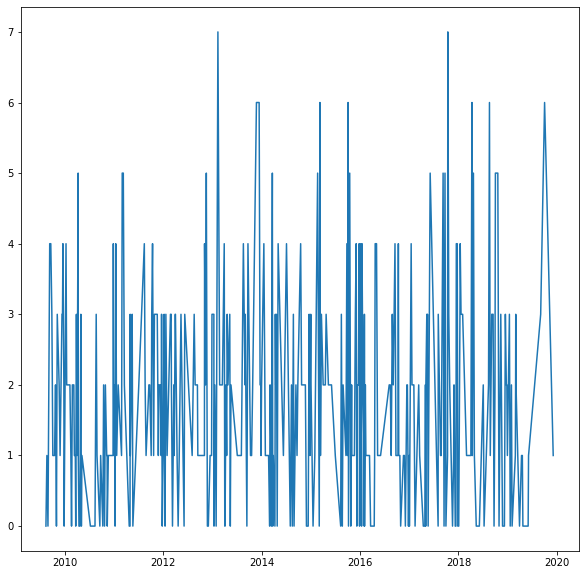

In [82]:
#need more data engineering
fig, ax = plt.subplots(figsize=(10,10))
reds = [full_record.Accum_home_reds, full_record.Accum_away_reds]

ax.plot(full_record.Final_Goals_H);